In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def merge_fleet_avl(fleet_data_path, avl_data_path):
    avl_data = pd.read_csv(avl_data_path)
    fleet_data = pd.read_excel(fleet_data_path)
    avl_data.columns = ['IMEI Unit', 'start_time', 'stop_time', 'distance_travelled', 'moving_time', 'idle_time', 'speed']
    merge_df = pd.merge(avl_data, fleet_data, on='IMEI Unit', how='inner')
    merge_df = merge_df.drop(merge_df.iloc[:, -2:].columns, axis=1)
    
    return merge_df


def calculate_service_year(df):
    vehicle_ids = df['IMEI Unit'].unique()
    for id in vehicle_ids:
        start_year = df.loc[df['IMEI Unit'] == id, 'start_time'].min()
        start_year = int(str(start_year)[:4])
        stop_year = df.loc[df['IMEI Unit'] == id, 'stop_time'].max()
        stop_year = int(str(stop_year)[:4])
        df.loc[df['IMEI Unit'] == id, 'start_year'] = start_year
        df.loc[df['IMEI Unit'] == id, 'stop_year'] = stop_year

        if stop_year < 2025:            
            service_year = stop_year - start_year                      
            df.loc[df['IMEI Unit'] == id, 'service_year'] = service_year
        else:  # if stop year is 2025, the vehicle is still in service, we assume service-year of this vehicle is 0 for now
            df.loc[df['IMEI Unit'] == id, 'service_year'] = 0   

    return df

In [138]:
avl_data_path = '../RND.csv'
fleet_data_path = '../Aramco Leased Vehicles - from 2012 up-to-date.xlsx'
avl_data = pd.read_csv(avl_data_path)
fleet_data = pd.read_excel(fleet_data_path)
avl_data.columns = ['IMEI Unit', 'start_time', 'stop_time', 'distance_travelled', 'moving_time', 'idle_time', 'speed']
print(len(avl_data['IMEI Unit'].unique()), len(fleet_data['IMEI Unit'].unique()))
len(set(avl_data['IMEI Unit'].unique()) & set(fleet_data['IMEI Unit'].unique()))

d:\projects\SAO fleet modeling\fleet_modeling_repo\.venv\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


24875 11254


5325

In [ ]:
avl_data_path = '../RND.csv'
fleet_data_path = '../Aramco Leased Vehicles - from 2012 up-to-date.xlsx'
merge_df = merge_fleet_avl(fleet_data_path, avl_data_path)
merge_df.head()

,IMEI Unit,start_time,stop_time,distance_travelled,moving_time,idle_time,speed,Pri. Stat.,Vehicle Door No,Make,Model,Model Year,Activity Type,Activity Type Description,Actual Retired Date,Fuel Type,start_year,stop_year,service_year
0,354725060308701,20141218160701,20141218165301,31.73,1465,935,96,TRP,RT3404,Chevy,Silverado,2014,TL025,Pickup 4x2 1/2 Ton,NaN,Gasoline,2014.0,2025.0,0.0
1,354725060308701,20141221052118,20141221164320,69.54,3470,1346,111,TRP,RT3404,Chevy,Silverado,2014,TL025,Pickup 4x2 1/2 Ton,NaN,Gasoline,2014.0,2025.0,0.0
2,354725060308701,20141222051716,20141222164606,61.85,4068,1161,111,TRP,RT3404,Chevy,Silverado,2014,TL025,Pickup 4x2 1/2 Ton,NaN,Gasoline,2014.0,2025.0,0.0
3,354725060308701,20141223051720,20141223163704,62.67,3528,398,111,TRP,RT3404,Chevy,Silverado,2014,TL025,Pickup 4x2 1/2 Ton,NaN,Gasoline,2014.0,2025.0,0.0
4,354725060308701,20141224051843,20141224163713,82.17,4760,1222,111,TRP,RT3404,Chevy,Silverado,2014,TL025,Pickup 4x2 1/2 Ton,NaN,Gasoline,2014.0,2025.0,0.0


In [39]:
merge_df['IMEI Unit'].nunique()

5325

In [143]:
merge_df[merge_df['Model Year'] == 2013]['IMEI Unit'].unique()

array([355200045061493, 868259022923596, 869395036633687, 355515790182651,
       352739095524531, 868822040404301, 355200045082978, 869395037841396,
       354725060327016, 355200040463728, 357207054954979, 359394052112681,
       355200045113583, 359394053811281, 359394053800169, 357207054955299,
       359394053783589, 359394053783506, 359394053782409, 359394053783779,
       359394053812503, 359394052111477, 359394053851071, 359394053854620,
       359394052113168, 359394053791822, 359394053853556, 359394053794347,
       357207054956958, 359394053854471, 357207052925559, 357207051359214,
       357207053817243, 357207052926946, 359394052113861, 359394053787143,
       359394053854638, 359394053811331, 359394053810085, 359394052104258,
       357207053819181, 359394053785873, 359394053783423, 359394052105388,
       359394053829838, 355200045039762, 359394053838250, 355200045041933,
       355200046941487, 357207053820973], dtype=object)

In [116]:
vehicle_2013 = merge_df[merge_df['Model Year'] == 2013]['IMEI Unit'].unique()
start_year_2013 = [merge_df[merge_df['IMEI Unit'] == id]['start_year'].min() for id in vehicle_2013]
print(min(start_year_2013), max(start_year_2013))

2024.0 2024.0


[[10, 2014], [4, 2015], [329, 2022], [57, 2021], [654, 2023], [9, 2020], [16, 2018], [25, 2019], [50, 2013], [4171, 2024]]


Text(0.5, 1.0, 'Number of Vehicles per Model Year')

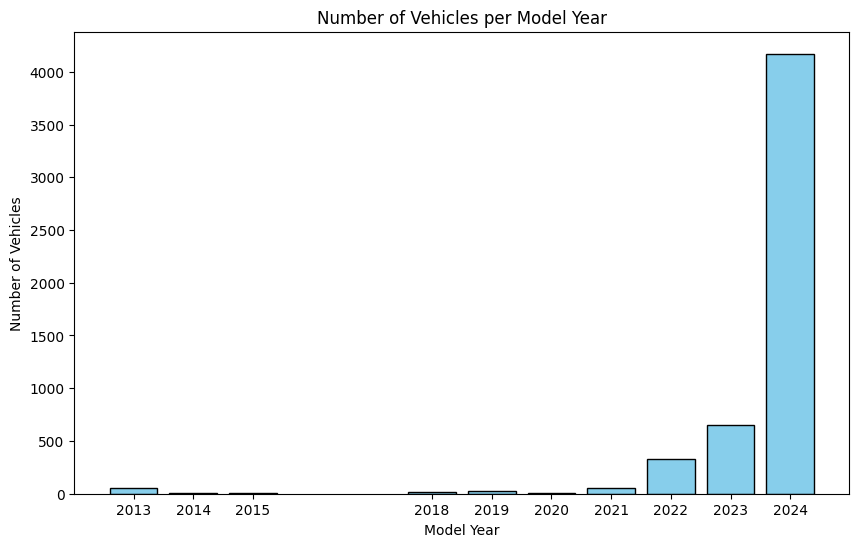

In [ ]:
model_years = merge_df['Model Year'].unique()
num_vehicle_per_model_year = [[merge_df[merge_df['Model Year'] == year]['IMEI Unit'].nunique(), year] for year in model_years]
print(num_vehicle_per_model_year)
sum([arr[0] for arr in num_vehicle_per_model_year])

# Visualization
plt.figure(figsize=(10, 6))
x_values = [arr[1] for arr in num_vehicle_per_model_year]  # First elements for x-axis
y_values = [arr[0] for arr in num_vehicle_per_model_year]  # Second elements for y-axis
plt.bar(x_values, y_values, color='skyblue', edgecolor='black')
plt.xticks(x_values)
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles per Model Year')



Text(0, 0.5, 'Number of Vehicles')

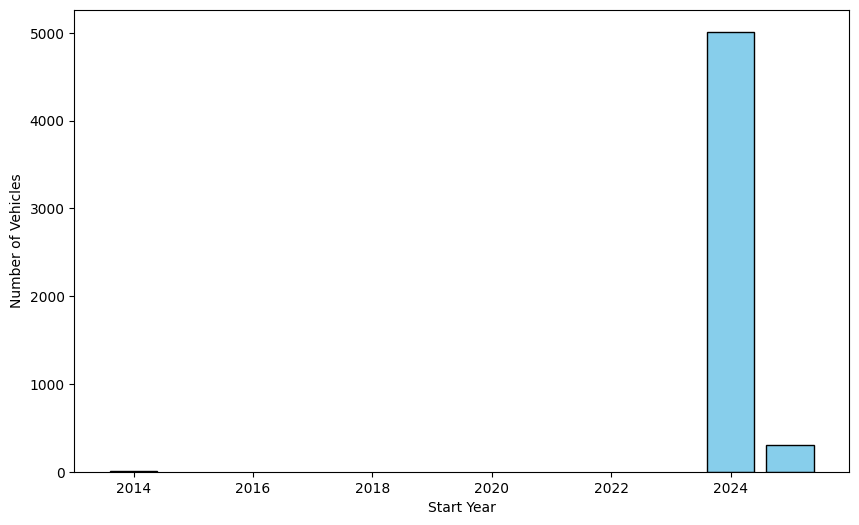

In [140]:
num_vehicle_per_start_year = merge_df.groupby('start_year')['IMEI Unit'].nunique()
plt.figure(figsize=(10, 6))
plt.bar(num_vehicle_per_start_year.index, num_vehicle_per_start_year.values, color='skyblue', edgecolor='black')
plt.xlabel('Start Year')        
plt.ylabel('Number of Vehicles')

In [6]:
df = calculate_service_year(merge_df)
df.head()

,IMEI Unit,start_time,stop_time,distance_travelled,moving_time,idle_time,speed,Pri. Stat.,Vehicle Door No,Make,Model,Model Year,Activity Type,Activity Type Description,Actual Retired Date,Fuel Type,start_year,stop_year,service_year
0,354725060308701,20141218160701,20141218165301,31.73,1465,935,96,TRP,RT3404,Chevy,Silverado,2014,TL025,Pickup 4x2 1/2 Ton,NaN,Gasoline,2014.0,2025.0,0.0
1,354725060308701,20141221052118,20141221164320,69.54,3470,1346,111,TRP,RT3404,Chevy,Silverado,2014,TL025,Pickup 4x2 1/2 Ton,NaN,Gasoline,2014.0,2025.0,0.0
2,354725060308701,20141222051716,20141222164606,61.85,4068,1161,111,TRP,RT3404,Chevy,Silverado,2014,TL025,Pickup 4x2 1/2 Ton,NaN,Gasoline,2014.0,2025.0,0.0
3,354725060308701,20141223051720,20141223163704,62.67,3528,398,111,TRP,RT3404,Chevy,Silverado,2014,TL025,Pickup 4x2 1/2 Ton,NaN,Gasoline,2014.0,2025.0,0.0
4,354725060308701,20141224051843,20141224163713,82.17,4760,1222,111,TRP,RT3404,Chevy,Silverado,2014,TL025,Pickup 4x2 1/2 Ton,NaN,Gasoline,2014.0,2025.0,0.0


(527522, 19)

In [70]:
print(df['Model Year'].unique(), df['start_year'].unique())

[2014 2015 2022 2021 2023 2020 2018 2019 2013 2024] [2014. 2024. 2025.]


In [87]:
df[df['Model Year'] == 2013]['start_year'].unique()

array([2024.])